In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Set pandas to display all columns
pd.set_option('display.max_columns', None)


In [3]:
# Load the data from the 'data' folder (we go one level up '..')
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.info()
#in the totalCharges columns we notice the type is object which it cannot be and object since it should be a number like monthlyCharges
#so we can conclude that the missing values are there

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# 'TotalCharges' has spaces, which is why it's an object.
# We force errors for these spaces to 'NaN' (Not a Number)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now we fill the 11 missing values with the median
median_total_charges = df['TotalCharges'].median()


df['TotalCharges'] = df['TotalCharges'].fillna(median_total_charges)

# Check our work
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# This ID is unique to each customer and doesn't help predict churn.
#because also it's random and It has absolutely no effect on whether a person stays or leaves. 
#A customer doesn't cancel their internet because their ID starts with "7".
df = df.drop('customerID', axis=1)

<Axes: xlabel='InternetService', ylabel='count'>

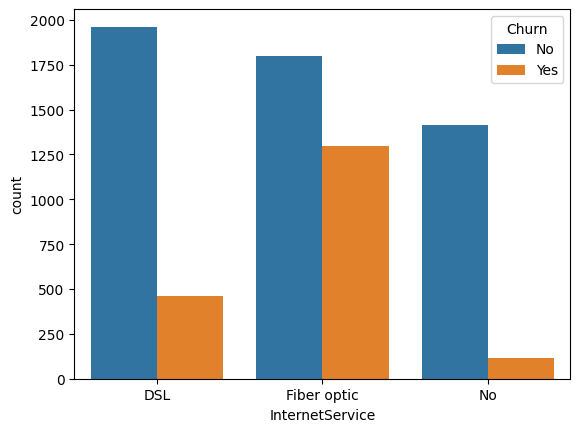

In [10]:
sns.countplot(x='InternetService', hue='Churn', data=df)
#tells the library (Seaborn) to draw a bar chart with three specific


<Axes: xlabel='PaymentMethod', ylabel='count'>

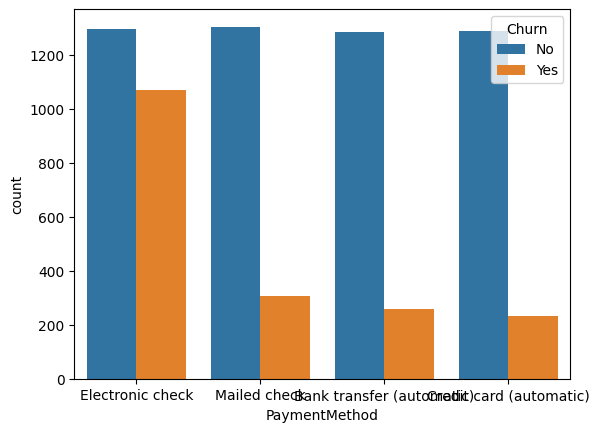

In [11]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)

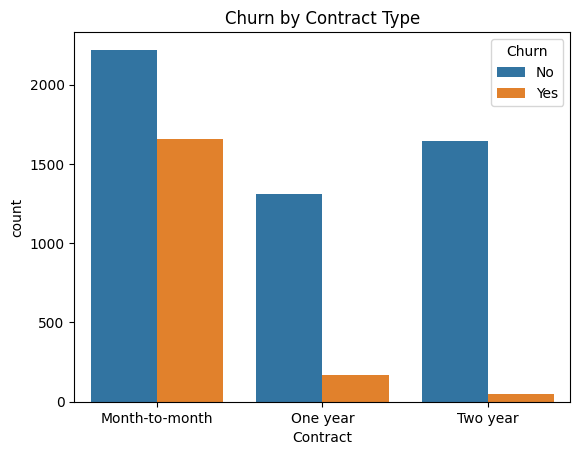

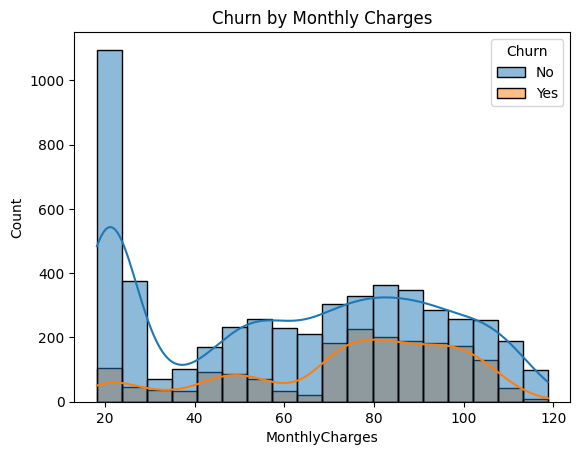

In [12]:
# See how contract type affects churn
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()

# See how monthly charges affect churn
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True)
plt.title('Churn by Monthly Charges')
plt.show()


In [13]:
# Convert the target variable 'Churn' to numbers
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])
# Churn: No=0, Yes=1


In [14]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [15]:
# We need to tell scikit-learn which columns are numbers and which are text

# Numerical columns to be scaled
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Categorical columns to be one-hot encoded
categorical_features = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Note: 'SeniorCitizen' is 0/1, but we'll treat it as categorical for consistency.


In [16]:
# This is a powerful tool to handle all preprocessing in one step

# Create a transformer for numeric columns (scale them)
numeric_transformer = StandardScaler()

# Create a transformer for categorical columns (one-hot encode them)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Don't drop any other columns (though there are none)
)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply the preprocessor
# We 'fit_transform' on the training data (learns the scaling/categories)
X_train_processed = preprocessor.fit_transform(X_train)

# We ONLY 'transform' on the test data (uses the *same* scaling/categories)
X_test_processed = preprocessor.transform(X_test)


In [18]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC()
}

for name, model in models.items():
    print(f"--- Training {name} ---")
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    print(classification_report(y_test, y_pred))

--- Training LogisticRegression ---
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

--- Training RandomForest ---
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1035
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409

--- Training SVM ---
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.

In [19]:
# This grid is small to run quickly.
param_grid = {
    'n_estimators': [100, 200], # Number of trees
    'max_depth': [10, 20, None] # How deep the trees can be
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42), 
    param_grid, 
    cv=3, # 3-fold cross-validation
    scoring='f1', # Focus on f1-score for churn
    n_jobs=-1 # Use all your computer's cores
)

print("Starting Grid Search... (This may take a minute)")
grid_search.fit(X_train_processed, y_train)

print(f"Best parameters: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_processed)
print("--- Report for Best Model (Random Forest) ---")
print(classification_report(y_test, y_pred))

Starting Grid Search... (This may take a minute)
Best parameters: {'max_depth': 10, 'n_estimators': 200}
--- Report for Best Model (Random Forest) ---
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.51      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [20]:
# We must save BOTH the preprocessor and the model.
# The API will need the preprocessor to transform new data.

joblib.dump(preprocessor, '../preprocessor.pkl')
joblib.dump(best_model, '../churn_model.pkl')

print("Preprocessor and Model saved to project root folder.")

Preprocessor and Model saved to project root folder.
